In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [53]:
import yfinance as yf
import datetime as dt

stock = "GS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [54]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GS,GS,GS,GS,GS
Date,,,,,
2000-01-03,62.302784,66.579762,61.905951,66.447484,1822600
2000-01-04,58.378529,61.729562,58.025788,61.376822,1647700
2000-01-05,55.644806,57.761249,55.292065,57.055768,1516600
2000-01-06,58.025776,59.613107,55.468409,55.468409,1845100
2000-01-07,58.246277,58.687202,56.350297,58.599017,1127400


In [55]:
df = df.reset_index()

In [56]:
df.to_csv("gs.csv")

In [57]:
data01 = pd.read_csv("gs.csv")

In [58]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,GS,GS,GS,GS,GS
1,0,2000-01-03,62.30278396606445,66.57976205856852,61.90595094717232,66.44748438560448,1822600
2,1,2000-01-04,58.3785285949707,61.729561958428235,58.02578824092254,61.376821604380076,1647700
3,2,2000-01-05,55.644805908203125,57.761248605187085,55.2920654587058,57.055767706192434,1516600
4,3,2000-01-06,58.02577590942383,59.613107165304726,55.46840888606017,55.46840888606017,1845100


In [59]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [60]:
df = df.drop(['Date'], axis = 1)

<ipython-input-60-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [61]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [62]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

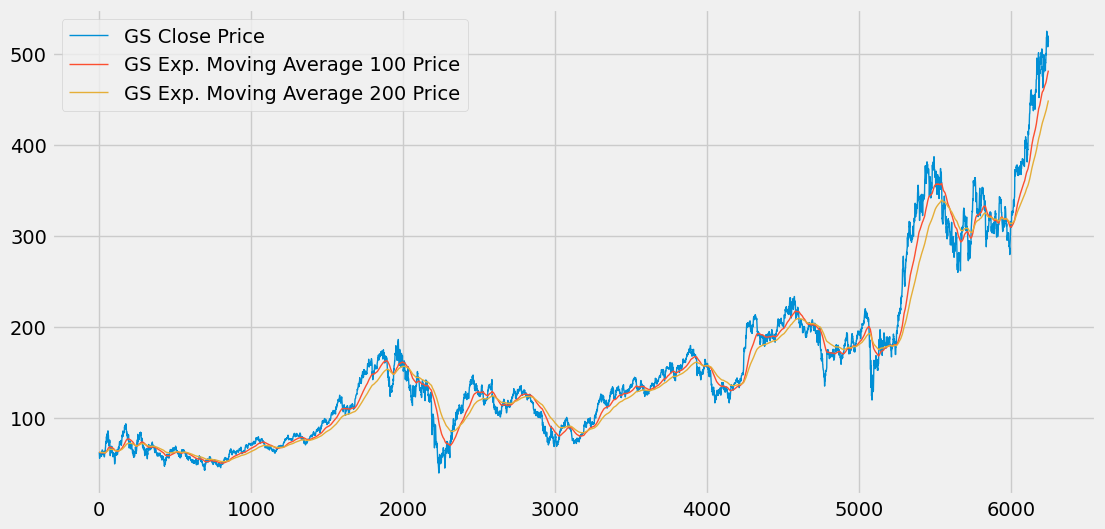

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [64]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [66]:
data_training_array = scaler.fit_transform(data_training)

In [67]:
x_train = np.array([data_training_array[i-100:i] for i in range(100, len(data_training_array))])
y_train = data_training_array[100:, 0]

In [68]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [69]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 50, validation_split=0.2)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 2.2132e-04 - loss: 0.0386 - val_accuracy: 0.0012 - val_loss: 0.0146
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 5.8989e-05 - loss: 0.0050 - val_accuracy: 0.0012 - val_loss: 0.0037
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 1.0903e-05 - loss: 0.0043 - val_accuracy: 0.0012 - val_loss: 0.0055
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 4.6198e-05 - loss: 0.0037 - val_accuracy: 0.0012 - val_loss: 0.0020
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 1.6495e-05 - loss: 0.0034 - val_accuracy: 0.0012 - val_loss: 0.0022
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 6.5603e-05 - loss: 0.0035 - val_accuracy: 0.0012 - val_loss: 0.0114
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 9.3683e-05 - loss: 0.0029 - val_accuracy: 0.0012 - val_loss: 0.0074
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 2.

In [72]:
past_100_days = data_training.tail(100)

In [73]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [74]:
input_data = scaler.fit_transform(final_df)

In [75]:
x_test = np.array([input_data[i-100:i] for i in range(100, len(input_data))])
y_test = input_data[100:, 0]

In [76]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


In [77]:
y_predicted = y_predicted / scaler.scale_
y_test = y_test / scaler.scale_

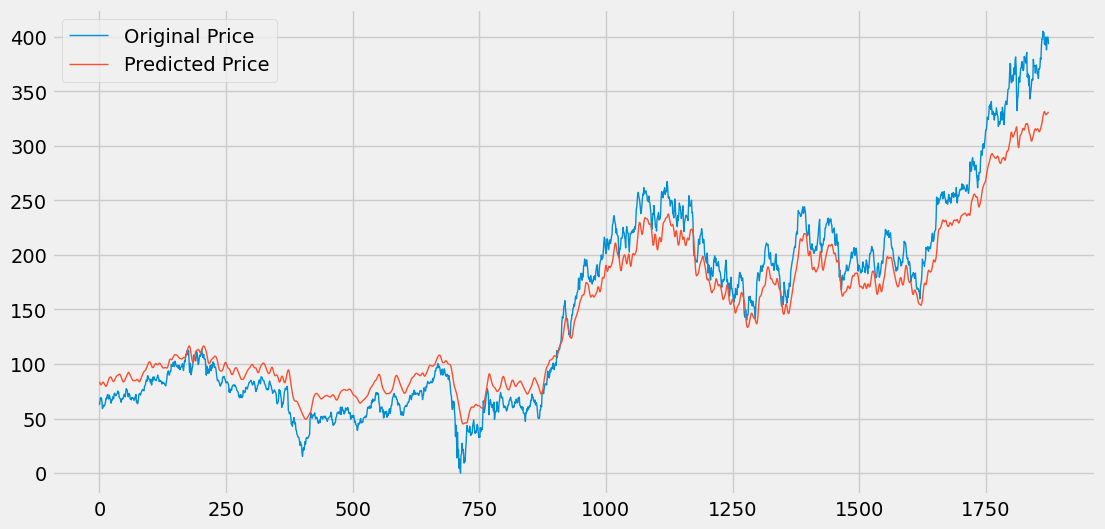

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [79]:
model.save('stock_dl_model.h5')